# Lab 1
Today: 
1. Linear regression
1. Overview of Pandas library: creation, exploration and vizualization of the data
1. Hypothesis testing: parametric vs non parametric, paired vs non paired

# Step 1. Linear regression

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

We first create a fake dataset with some random noise

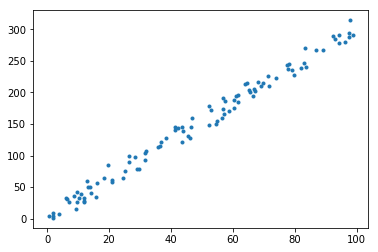

In [2]:
np.random.seed(0) # fix seed for reproducability
x = np.random.uniform(0., 100., 100) # np.random.uniform(low, high, n)
y = 3. * x + 2. + np.random.normal(0., 10., 100) # np.random.normal(mean, sigma, n)
plt.plot(x, y, '.');

Add column of 1's for intercept.

In [3]:
import statsmodels.api as sm
# add constant for intercept
x = sm.add_constant(x)

Use statsmodels implementation of Ordinary Least Squares.

In [4]:
model = sm.OLS(y,x)
res = model.fit()
print(res.params)
print(res.rsquared)

[ 4.22151077  2.9936935 ]
0.986852382137


Let's now plot the line along with the error (+/- sigma).

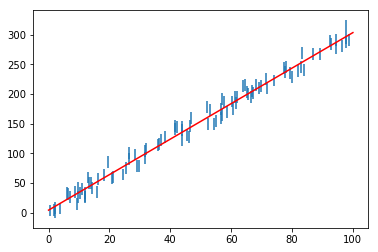

In [5]:
def line(x, a, b):
    return a * x + b
e = np.repeat(10., 100)
plt.errorbar(x[:,1], y, yerr=e, fmt="none")
xfine = np.linspace(0., 100., 100)  # define values to plot the function for
plt.plot(xfine, line(xfine, res.params[1], res.params[0]), 'r-');

### Exercise 1
1. Implement closed formula solution fo the parameters of Linear Regression (from lecture notes). 
1. Implement formula for coefficient of determination (R-squared)

Feel free to use any library, as default - use [numpy.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html).

Compare results with OLS method.

In [6]:
# here goes your solution for LR parameters
theta_1 = np.linalg.inv(np.dot(x.T, x))
theta_2 = np.dot(x.T, y)
theta = np.dot(theta_1, theta_2)
print(theta)

[ 4.22151077  2.9936935 ]


In [7]:
# here goes your solution for R-squared
y_mean = np.mean(y)
y_pred = np.dot(x, theta)  # predicted y
sum_1 = 0.0
sum_2 = 0.0
for it in np.nditer([y, y_pred]):
    sum_1 += np.square(it[1] - y_mean)
    sum_2 += np.square(it[0] - y_mean)
r_sq = sum_1 / sum_2
print(r_sq)

# Step 2. Data representation and interaction

**Pandas** in an open-source python package that is great for data structuring, preparation and analysis.

Features:
- Unified data representation using *DataFrame* objects - 2D heterogeneous tables with labeled axes;
- Database-like operations: join, union(append), group by, sort, column selection, filtering;
- Advanced operations: pivoting, reshaping, multi-indexing;
- Basic statistics: count, mean, std, min/max, quantiles;
- Vizualization with matplotlib.

## 1. Dataframe creation
Create dataframe by reading a csv file with brain size data (analyzed [here](https://www.researchgate.net/profile/Robert_Schultz2/publication/222881180_In_vivo_brain_size_and_intelligence_Intelligence_15_223-228/links/00b4952d94932772d4000000.pdf)).
The csv contains following columns:
1. Gender: Male or Female
1. FSIQ: Full Scale IQ scores 
1. VIQ: Verbal IQ scores 
1. PIQ: Performance IQ scores 
1. Weight: body weight in pounds
1. Height: height in inches
1. MRI_Count: total pixel Count from the 18 MRI scans

In [8]:
import pandas as pd
import os.path
data = pd.read_csv(os.getcwd() + '/examples/brain_size.csv', sep=';', na_values=".")

It is also possible to create dataset from dictionary

In [9]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [10]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,cos,sin,t
0,0.960170,0.279415,-6.000000
1,0.609977,0.792419,-5.368421
2,0.024451,0.999701,-4.736842
3,-0.570509,0.821291,-4.105263
4,-0.945363,0.326021,-3.473684
5,-0.955488,-0.295030,-2.842105
6,-0.596979,-0.802257,-2.210526
7,-0.008151,-0.999967,-1.578947
8,0.583822,-0.811882,-0.947368
9,0.950551,-0.310567,-0.315789


## 2. Data exploration
Let's consider simple operations to operate with dataframe.

In [11]:
data.shape

In [12]:
data.columns

To get one column from DataFrame it is possible to use `[]` with the column name.

In [13]:
data['Gender']

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object

You can also use boolean indexing to filter rows. For example to compute the *mean value* of verbal IQ score for females it is possible to use the following line:

In [14]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

To get simple statistics for each column use `descibe` function:

In [15]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


The `groupby` operation allows to split dataframe into groups. 

It returns `GroupBy` object which can be used to apply a function for each group separately ([more](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-grouping) documentation on grouping).

In [16]:
groupby_gender = data.groupby('Gender')
groupby_gender['VIQ'].mean()

Gender
Female    109.45
Male      115.25
Name: VIQ, dtype: float64

In [17]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Exercise 2
	•	What is the mean value for VIQ for the full population?
	•	How many males/females were included in this study? 
	•	What is the average value of MRI counts expressed in log units, for males and females?
**Hint**: use ‘tab completion’ to find out the methods that can be called, instead of `mean` in the above example.

In [18]:
# print mean VIQ for the full population
data['VIQ'].mean()

112.34999999999999

In [19]:
# print the numbers of males and females
groupby_gender.size()

Gender
Female    20
Male      20
dtype: int64

In [20]:
# print average MRI counts in log units for each gender
groupby_gender['MRI_Count'].apply(np.average).apply(np.log)

Gender
Female    13.667770
Male      13.769315
Name: MRI_Count, dtype: float64

## 3. Data visualization
Let's use pandas plotting to make simple boxplots and 3x3 matrix of scatter plots for 3 columns.

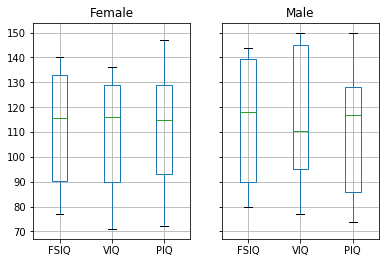

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# Box plots of different columns for each gender
groupby_gender = data.groupby('Gender')
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
plt.show()

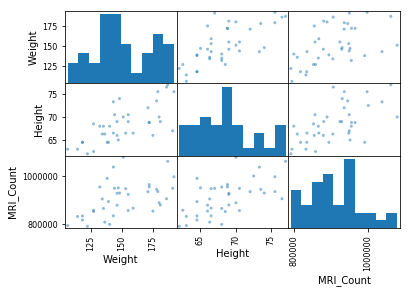

In [23]:
pd.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plt.show()

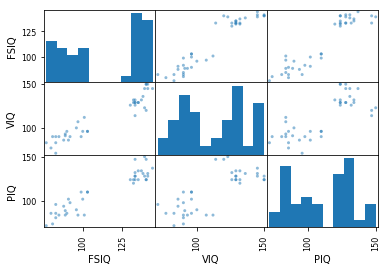

In [24]:
pd.scatter_matrix(data[['FSIQ', 'VIQ', 'PIQ']])
plt.show()

### Exercise 3

Plot the scatter matrix for males only, and for females only. 

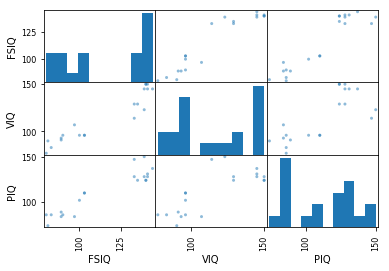

In [25]:
# scatter matrix for males
pd.scatter_matrix(data[data['Gender'] == 'Male'][['FSIQ', 'VIQ', 'PIQ']])
plt.show()

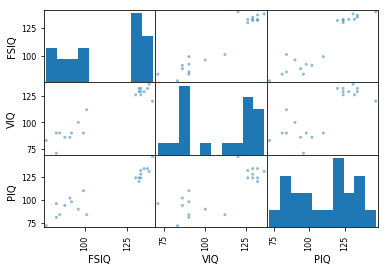

In [26]:
# scatter matrix for females
pd.scatter_matrix(data[data['Gender'] == 'Female'][['FSIQ', 'VIQ', 'PIQ']])
plt.show()

# Step 3. Hypothesis testing: comparing two groups

Simple statistical test can be done using `scipy.stats` package (see [more](http://www.scipy-lectures.org/intro/scipy.html#scipy)).

In [26]:
from scipy import stats

Student’s t-test: the simplest statistical test
=========

1-sample t-test: testing the value of a population mean
------

![norm](http://www.scipy-lectures.org/_images/two_sided.png)

`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean).

It returns the T-statistic, and the p-value (see [more](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp)):


In [28]:
stats.ttest_1samp(data['VIQ'], 0)

**Tip**: With a p-value of $10^{-28}$ we can claim that the population mean for the verbal IQ score is not 0.



2-sample t-test: testing for difference across populations
--------

We have seen above that the mean `VIQ` in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with `scipy.stats.ttest_ind()`:


In [29]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

Can we claim that male and female mean value of `VIQ` are significantly different?

*No, we can't as far as p-value > 0.05*

Paired tests: repeated measurements on the same individuals
------
`PIQ`, `VIQ`, and `FSIQ` give 3 measures of IQ. Let us test if `FSIQ` and `PIQ` are significantly different. We can again use a 2 sample test:

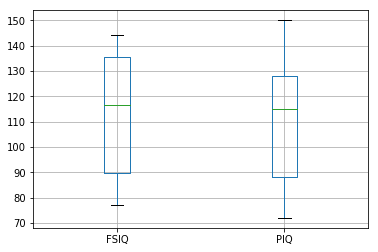

In [30]:
data.boxplot(column=['FSIQ', 'PIQ']);

In [31]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:


In [32]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

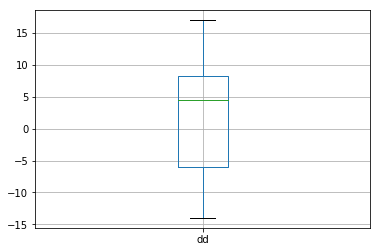

In [33]:
data['dd'] = data['FSIQ'] - data['PIQ']
data.boxplot(column=['dd']);

This is equivalent to a 1-sample test on the difference:

In [48]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:

In [47]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

**Note**: The corresponding test in the non-paired case is the Mann–Whitney U test,  `scipy.stats.mannwhitneyu()`.

### Exercise 4
	•	Test the difference between weights in males and females.
	•	Test the difference between VIQ in males and females without the assumption of Gaussian error.

Ttest_indResult(statistic=-4.8709509219406959, pvalue=2.2272930183621181e-05)

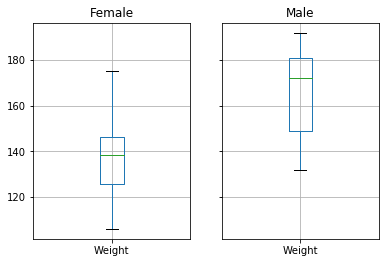

In [45]:
# difference in weigth between genders?
groupby_gender.boxplot(column=['Weight'])
weight_males = data[data['Gender'] == 'Male']['Weight'].dropna()
weight_females = data[data['Gender'] == 'Female']['Weight'].dropna()
stats.ttest_ind(weight_females, weight_males)

WilcoxonResult(statistic=82.5, pvalue=0.40071152819253142)

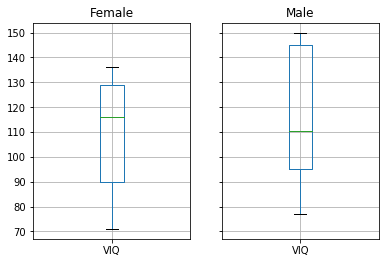

In [50]:
# difference in VIQ between genders (don't assume Gaussian errors)
groupby_gender.boxplot(column=['VIQ'])
viq_males = data[data['Gender'] == 'Male']['VIQ'].dropna()
viq_females = data[data['Gender'] == 'Female']['VIQ'].dropna()
stats.wilcoxon(viq_females, viq_males)